# Import libraries

In [11]:
# General libraries
import numpy as np
from pyDOE import lhs

# Simulation libraries
import skysurvey_sniapop

# Module functions
import ximinf.selection_effects as se
import ximinf.generate_sim as gsim

# Plot libraries
import matplotlib.pyplot as plt

# Generate one test sample

In [12]:
brokenalpha_model = skysurvey_sniapop.brokenalpha_model

M = 15_000
# alpha_low = 0.271
# alpha_high = 0.083
alpha_ = 0.161
beta_ = 3.05 #3.31
mabs_ = -19.3

_, flat = gsim.simulate_one(0, alpha_, beta_, mabs_, sigma_int=0.15, z_max=0.2, M=M)

# Applying selection effect
print('Applying selection effect...')
m_lim = 19.5
flat_sel = se.malmquist_bias(flat, m_lim, M)
print('...done')


Applying selection effect...
...done


# Plot sample

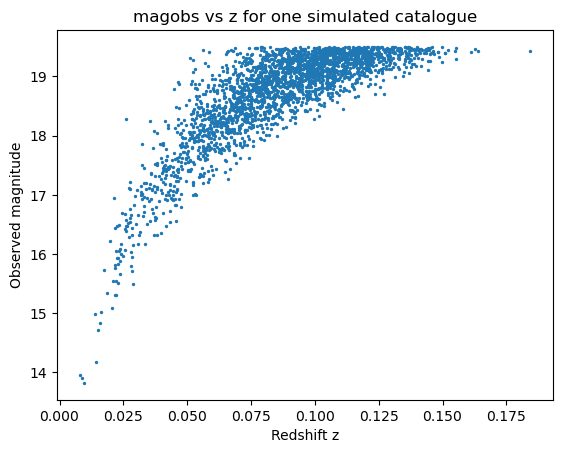

Number of SNe after selection: 2556


In [13]:
# parse flattened catalogue
params, df = gsim.unflatten_array(flat_sel, ['magobs', 'x1', 'c', 'z'], 3)

# remove padded zeros (non-detections)
df_sel = df[df['magobs'] > 0]

plt.figure()
plt.scatter(df_sel['z'], df_sel['magobs'], s=2)
plt.xlabel("Redshift z")
plt.ylabel("Observed magnitude")
plt.title("magobs vs z for one simulated catalogue")
plt.show()

print('Number of SNe after selection:', len(df_sel['magobs']))

# Save to disk

In [ ]:
np.save("data/inference_data.npy", flat_sel)